
>Dropout is a regularization technique used in deep learning to reduce overfitting.
During training, dropout randomly “drops out” (sets to 0) some neurons (with probability p) in a given layer at each forward pass.

 >Example: If p = 0.5, then half of the neurons in that layer are randomly ignored for that training step.


>Why do we need Dropout?

	•	In deep networks, neurons can co-adapt too much (rely on each other).
	•	This causes overfitting: the network memorizes training data instead of learning general patterns.
	•	Dropout forces the network to learn redundant, independent representations.


In [188]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [189]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Generate data
X, y = make_regression(n_samples=50, n_features=1, noise=10)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Reshape y to 2D
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

# Scale X
scaler_X = StandardScaler()
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

# Scale y
scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train)
y_test = scaler_y.transform(y_test)

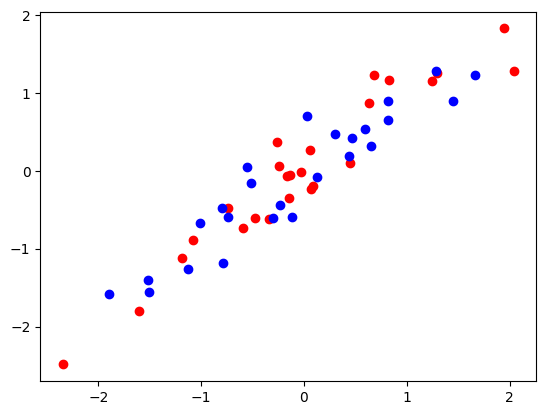

In [190]:

plt.scatter(X_train,y_train,c="r")
plt.scatter(X_test,y_test,c='b')

# regression model

In [191]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam


In [192]:
model_1 = Sequential()
model_1.add(Dense(128, input_dim=1, activation="relu"))
model_1.add(Dense(128, activation="relu"))
model_1.add(Dense(1, activation="linear"))
adam = Adam(learning_rate=0.01)
model_1.compile(loss='mse', optimizer=adam, metrics=['mse'])
history = model_1.fit(X_train, y_train, epochs=500, 
                    validation_data = (X_test, y_test),
                    verbose=1)

Epoch 1/500


/Users/owner/Desktop/deep-learning/deep_learning/lib/python3.13/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 670ms/step - loss: 0.8816 - mse: 0.8816 - val_loss: 0.1265 - val_mse: 0.1265
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.2052 - mse: 0.2052 - val_loss: 0.1472 - val_mse: 0.1472
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.1067 - mse: 0.1067 - val_loss: 0.2880 - val_mse: 0.2880
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.2037 - mse: 0.2037 - val_loss: 0.2093 - val_mse: 0.2093
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.1448 - mse: 0.1448 - val_loss: 0.1042 - val_mse: 0.1042
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0809 - mse: 0.0809 - val_loss: 0.0847 - val_mse: 0.0847
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1009 - mse: 0.1009 - val_loss: 0.0989 - val_mse: 0.0989
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1298 - mse: 0.1298 - val_loss: 0.0986 - val_mse: 0.0986
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1211 - mse: 0.1211 - va

In [193]:
# evaluate the model
_, train_mse = model_1.evaluate(X_train, y_train, verbose=0)
_, test_mse = model_1.evaluate(X_test, y_test, verbose=0)
print('Train: {}, Test: {}'.format(train_mse, test_mse))

Train: 0.03405630961060524, Test: 0.20280976593494415


In [194]:
y_pred_1 = model_1.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


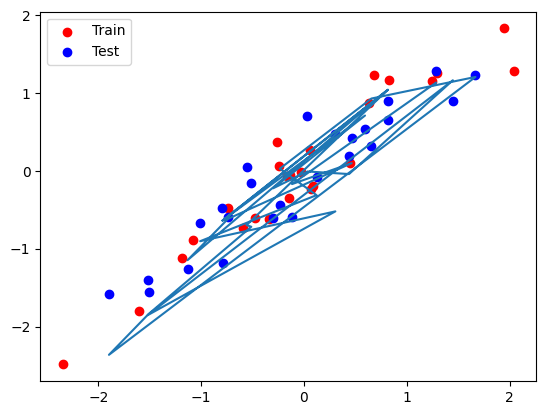

In [195]:
# the problem is due to not sorting the datapoint while poltinign. it 

plt.figure()
plt.scatter(X_train, y_train, c='red', label='Train')
plt.scatter(X_test, y_test, c='blue', label='Test')
plt.plot(X_test, y_pred_1)
plt.legend()
plt.show()

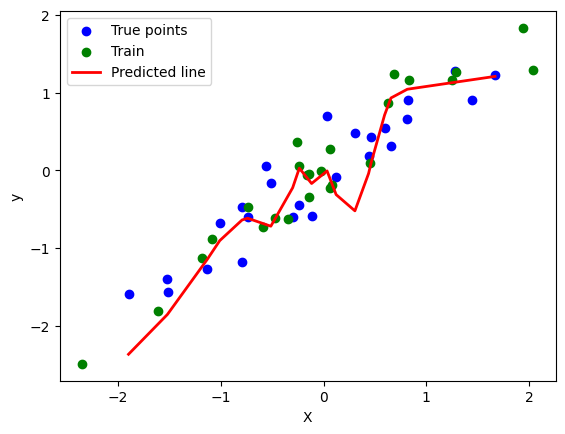

In [196]:
import numpy as np

# Sort X for nice line
sort_idx = np.argsort(X_test.flatten())
X_sorted = X_test[sort_idx]
y_pred_sorted = y_pred_1[sort_idx]

plt.scatter(X_test, y_test, color='blue', label='True points')
plt.scatter(X_train, y_train, c='g', label='Train')
plt.plot(X_sorted, y_pred_sorted, color='red', linewidth=2, label='Predicted line')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

>using the known technique

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 506us/step


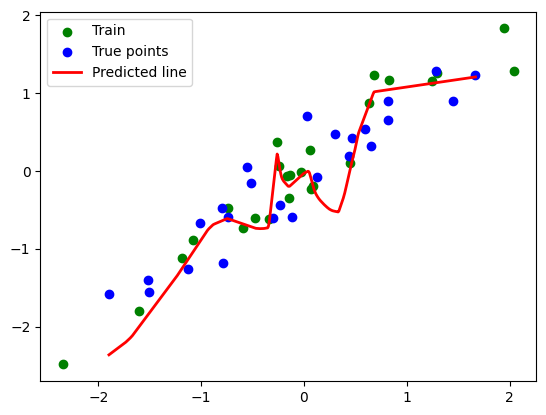

In [197]:
#numerical method plotting approach 
X_range = np.linspace(X_test.min(), X_test.max(), 500).reshape(-1, 1)
y_range_pred = model_1.predict(X_range)
plt.scatter(X_train, y_train, c='g', label='Train')
plt.scatter(X_test, y_test, color='blue', label='True points')
plt.plot(X_range, y_range_pred, color='red', linewidth=2, label='Predicted line')
plt.legend()
plt.show()

# dropout model

In [198]:
# when p=0.5
model_2 = Sequential()
model_2.add(Dense(128, input_dim=1, activation="relu"))
model_2.add(Dropout(0.5))
model_2.add(Dense(128, activation="relu"))
model_2.add(Dropout(0.5))
model_2.add(Dense(1, activation="linear"))
adam = Adam(learning_rate=0.01)
model_2.compile(loss='mse', optimizer=adam, metrics=['mse'])

drop_out_history = model_2.fit(X_train, y_train, epochs=500, 
                               validation_data = (X_test, y_test),
                               verbose=False)

In [199]:
# evaluate the model
_, train_mse = model_2.evaluate(X_train, y_train, verbose=0)
_, test_mse = model_2.evaluate(X_test, y_test, verbose=0)
print('Train: {}, Test: {}'.format(train_mse, test_mse))

Train: 0.05727897956967354, Test: 0.10970079153776169


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


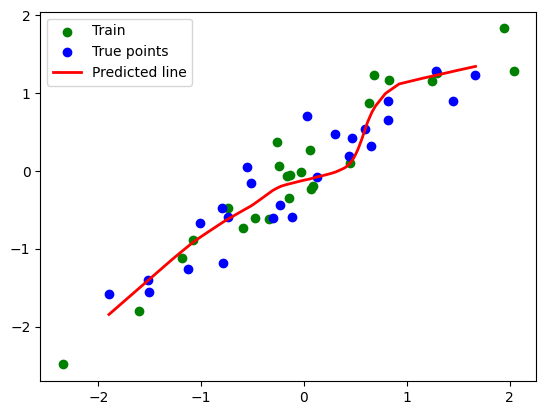

In [200]:
#numerical method plotting approach 
X_range = np.linspace(X_test.min(), X_test.max(), 500).reshape(-1, 1)
y_range_pred = model_2.predict(X_range)
plt.scatter(X_train, y_train, c='g', label='Train')
plt.scatter(X_test, y_test, color='blue', label='True points')
plt.plot(X_range, y_range_pred, color='red', linewidth=2, label='Predicted line')
plt.legend()
plt.show()

In [201]:
# when p=0.3
model_2 = Sequential()
model_2.add(Dense(128, input_dim=1, activation="relu"))
model_2.add(Dropout(0.5))
model_2.add(Dense(128, activation="relu"))
model_2.add(Dropout(0.5))
model_2.add(Dense(1, activation="linear"))
adam = Adam(learning_rate=0.01)
model_2.compile(loss='mse', optimizer=adam, metrics=['mse'])

drop_out_history = model_2.fit(X_train, y_train, epochs=500, 
                               validation_data = (X_test, y_test),
                               verbose=False)

In [202]:
# evaluate the model
_, train_mse = model_2.evaluate(X_train, y_train, verbose=0)
_, test_mse = model_2.evaluate(X_test, y_test, verbose=0)
print('Train: {}, Test: {}'.format(train_mse, test_mse))

Train: 0.04736797511577606, Test: 0.12469808757305145


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


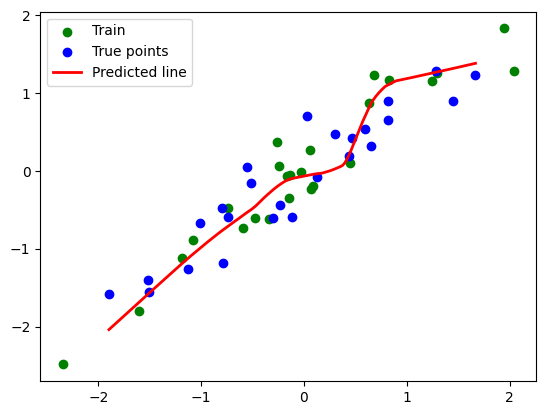

In [203]:
#numerical method plotting approach 
X_range = np.linspace(X_test.min(), X_test.max(), 500).reshape(-1, 1)
y_range_pred = model_2.predict(X_range)
plt.scatter(X_train, y_train, c='g', label='Train')
plt.scatter(X_test, y_test, color='blue', label='True points')
plt.plot(X_range, y_range_pred, color='red', linewidth=2, label='Predicted line')
plt.legend()
plt.show()

# CLASSIFICATION MODEL

In [232]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Generate data
X, y = make_classification(
    n_samples=500,
    n_features=2,        # 2 input features
    n_informative=2,     # both features are informative
    n_redundant=0,       # no redundant features
    n_repeated=0,        # no repeated features
    n_classes=2,         # binary classification
    n_clusters_per_class=1,
    random_state=42
)





In [233]:
np.shape(X)

(500, 2)

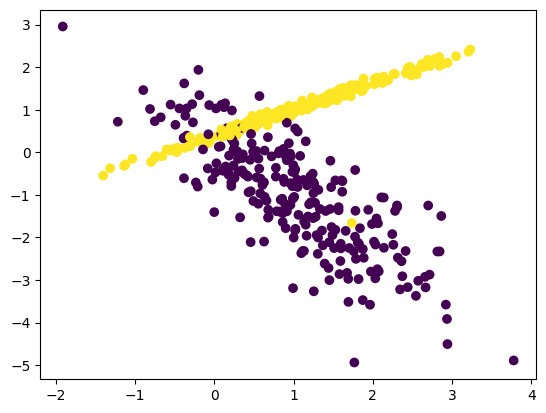

In [234]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [235]:

model = Sequential()

model.add(Dense(128, input_dim=2, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

adam = Adam(learning_rate=0.01)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history = model.fit(X, y, epochs=500, validation_split = 0.2,verbose=1)

Epoch 1/500


/Users/owner/Desktop/deep-learning/deep_learning/lib/python3.13/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8600 - loss: 0.3065 - val_accuracy: 0.8800 - val_loss: 0.2107
Epoch 2/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9575 - loss: 0.1567 - val_accuracy: 0.9300 - val_loss: 0.2522
Epoch 3/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9525 - loss: 0.1447 - val_accuracy: 0.9300 - val_loss: 0.1566
Epoch 4/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9650 - loss: 0.1190 - val_accuracy: 0.9700 - val_loss: 0.1356
Epoch 5/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9750 - loss: 0.1098 - val_accuracy: 0.9400 - val_loss: 0.1060
Epoch 6/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9825 - loss: 0.0978 - val_accuracy: 0.9300 - val_loss: 0.1273
Epoch 7/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9775 - loss: 0.0967 - val_accuracy: 0.9700 - val_loss: 0.0769
Epoch 8/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9850 - loss: 0.0814 - val_accuracy: 0.9300 - val_loss: 0.1

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 2s 166us/step


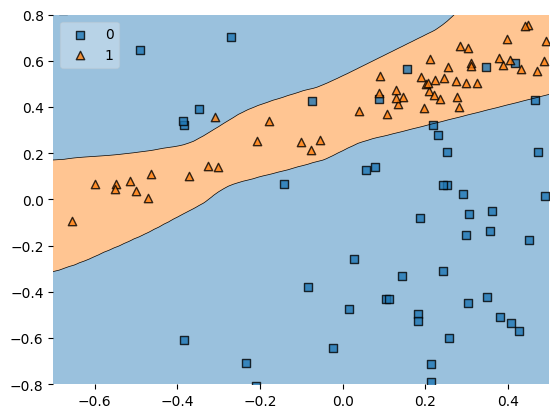

In [236]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X, y.astype('int'), clf=model, legend=2)
plt.xlim(-0.7,0.5)
plt.ylim(-0.8,0.8)
plt.show()

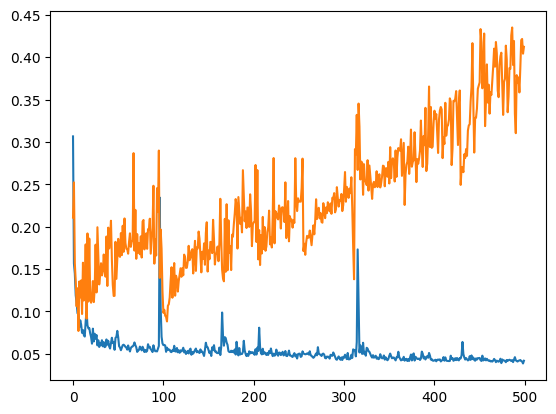

In [239]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

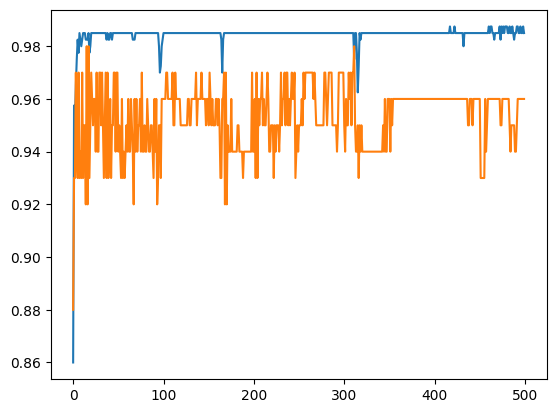

In [240]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

# dropout implementation

In [241]:
model = Sequential()

model.add(Dense(128, input_dim=2, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation="sigmoid"))

adam = Adam(learning_rate=0.01)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history = model.fit(X, y, epochs=500, validation_split = 0.2,verbose=1)

Epoch 1/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8725 - loss: 0.2815 - val_accuracy: 0.9200 - val_loss: 0.1737
Epoch 2/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9200 - loss: 0.2098 - val_accuracy: 0.9400 - val_loss: 0.1879
Epoch 3/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9525 - loss: 0.1985 - val_accuracy: 0.9600 - val_loss: 0.1408
Epoch 4/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9625 - loss: 0.1586 - val_accuracy: 0.9300 - val_loss: 0.1924
Epoch 5/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9650 - loss: 0.1445 - val_accuracy: 0.9300 - val_loss: 0.1589
Epoch 6/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9600 - loss: 0.1423 - val_accuracy: 0.9800 - val_loss: 0.1086
Epoch 7/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9750 - loss: 0.1404 - val_accuracy: 0.9400 - val_loss: 0.1314
Epoch 8/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9750 - loss: 0.1391 - val_accuracy: 0.9400 - v

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 2s 198us/step


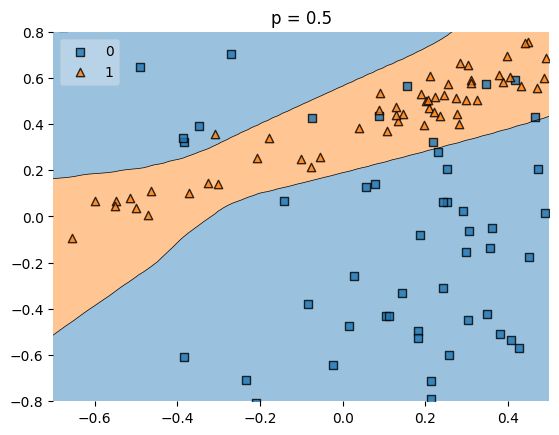

In [242]:
plot_decision_regions(X, y.astype('int'), clf=model, legend=2)
plt.xlim(-0.7,0.5)
plt.ylim(-0.8,0.8)
plt.title('p = 0.5')
plt.show()

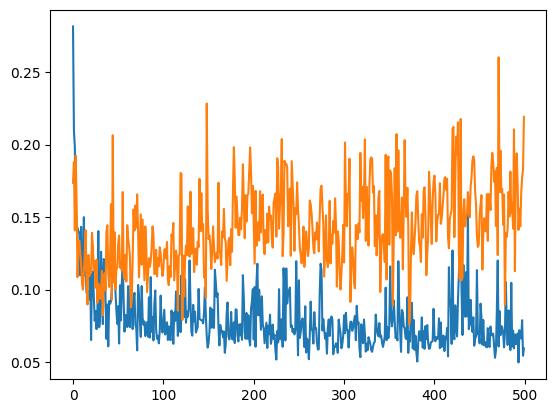

In [243]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

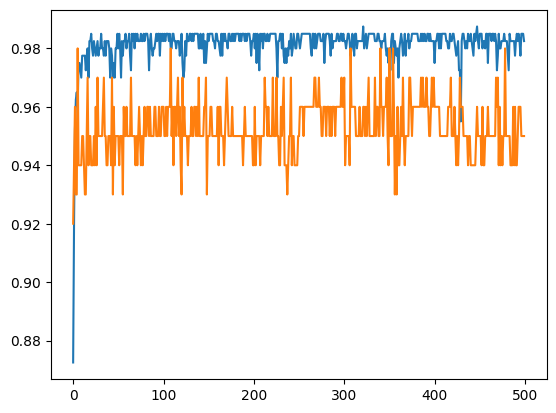

In [244]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

# Effect of p
	•	High p (e.g., 0.7–0.8): Many neurons are dropped → network learns more robust features, but too high can underfit.
	•	Low p (e.g., 0.1–0.3): Few neurons are dropped → less regularization, still can overfit if network is large.
	•	Usually, 0.2–0.5 is used for hidden layers.


